# Hacktiv8 Python For Data Science // S.11 // Inferential Statistics

## Statistik Inferential


Statistik inferensial mengambil data sebagai sampel dari populasi yang lebih besar untuk membuat kesimpulan. Tujuan utama metode ini adalah untuk menarik kesimpulan dari sampel dan menggeneralisasikannya untuk populasi yang lebih besar. Oleh karena itu, kita perlu menemukan sampel dengan cara sehingga dapat mencerminkan populasi dengan benar. Ada terlalu banyak cara untuk mengambil sampel dari populasi, tetapi secara umum, pengambilan sampel acak memungkinkan kita untuk memiliki keyakinan bahwa sampel mewakili populasi.

Dalam kebanyakan kasus, tidak mungkin untuk mengukur atau memahami seluruh populasi; dalam hal itu, pengambilan sampel menyelamatkan kita. Akibatnya, kecil kemungkinan nilainya sama ketika kami mencoba memperkirakan properti populasi dari sampel.

## Kenapa membutuhkan statistik inferential?


Pertimbangkan kasus di mana Anda tertarik pada jumlah rata-rata jam anak-anak menonton televisi per hari. Sekarang Anda tahu bahwa anak-anak di wilayah Anda rata-rata menonton televisi selama 1 jam per hari. Bagaimana Anda menemukan ini untuk semua anak?

Ada 2 metode yang dapat Anda gunakan untuk menghitung hasil:

- Kumpulkan data tentang masing-masing dan setiap anak.
- Gunakan data yang kita miliki untuk menghitung rata-rata keseluruhan.

    Metode pertama adalah tugas yang sangat sulit dan menakutkan. Jumlah upaya dan sumber daya yang dibutuhkan untuk menyelesaikan tugas ini akan sangat besar.

Metode kedua jauh lebih sederhana dan lebih mudah untuk dicapai. Tapi ada masalah. Anda tidak dapat menyamakan rata-rata yang Anda peroleh dari kumpulan data terbatas untuk seluruh populasi. Pertimbangkan kasus di mana anak-anak di daerah Anda lebih tertarik pada olahraga sehingga jumlah jam yang mereka habiskan di televisi secara signifikan lebih rendah daripada populasi keseluruhan. Bagaimana cara kita mencari makna populasi? Di sinilah statistik inferensial datang untuk menyelamatkan kita.

Statistik inferensial membantu kami menjawab pertanyaan-pertanyaan berikut:

- Membuat kesimpulan tentang populasi dari sampel
- Menyimpulkan apakah sampel berbeda secara signifikan dari populasi. Mari kita lihat contoh sebelumnya di mana saya menunjukkan bahwa sampel berbeda dari populasi karena anak-anak lebih tertarik pada olahraga daripada menonton televisi.
- Jika menambahkan atau menghapus fitur dari suatu model akan membantu meningkatkannya.
- Jika satu model berbeda secara signifikan dari yang lain.
- Pengujian Hipotesis.

## Confidence Interval

Dalam statistik, Confidence Interval (CI) adalah rentang nilai di mana ada probabilitas tertentu bahwa parameter populasi benar yang diharapkan ada di dalamnya. Ini mengusulkan rentang nilai yang masuk akal untuk parameter yang tidak diketahui. Interval memiliki tingkat kepercayaan terkait bahwa parameter sebenarnya dalam kisaran yang diusulkan. Ini lebih jelas dinyatakan sebagai: tingkat kepercayaan mewakili probabilitas bahwa parameter yang tidak diketahui terletak pada interval yang dinyatakan. Tingkat kepercayaan dapat dipilih oleh simpatisan. Secara umum, interval kepercayaan untuk parameter yang tidak diketahui didasarkan pada pengambilan sampel distribusi penduga yang sesuai.

Bayangkan Anda memutuskan untuk mengukur secara acak 40 pria di kota Anda dan Anda mendapatkan tinggi sampel rata-rata x̅ = 175 cm. Anda mungkin mendekati ketinggian sebenarnya (μ) populasi, tetapi kemungkinan nilai sebenarnya berada di antara 170 cm dan 180 cm. Paling akurat untuk mengatakan bahwa tinggi rata-rata pria di kota Anda adalah di antara interval [170 cm, 180 cm].

## Import modules

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

## Visualization Styling code

In [2]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')
warnings.filterwarnings('ignore')

## Membuat data berat badan masyrakat dalam pounds

Meghasilkan dua distribusi normal menggunakan metode nilai massa normal () modul numpy random untuk pria dan wanita. Saya menggabungkan dua array ini dan menetapkannya ke kolom us_people_mass_pounds dalam DataFrame df_ppl_mass.

In [3]:
np.random.seed(42)
normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=6500)
all_mass_values = np.concatenate((normal_distribution_us_male_mass_pounds, normal_distribution_us_female_mass_pounds), axis=0)
df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


## Melihat bagaimana distribusi data 

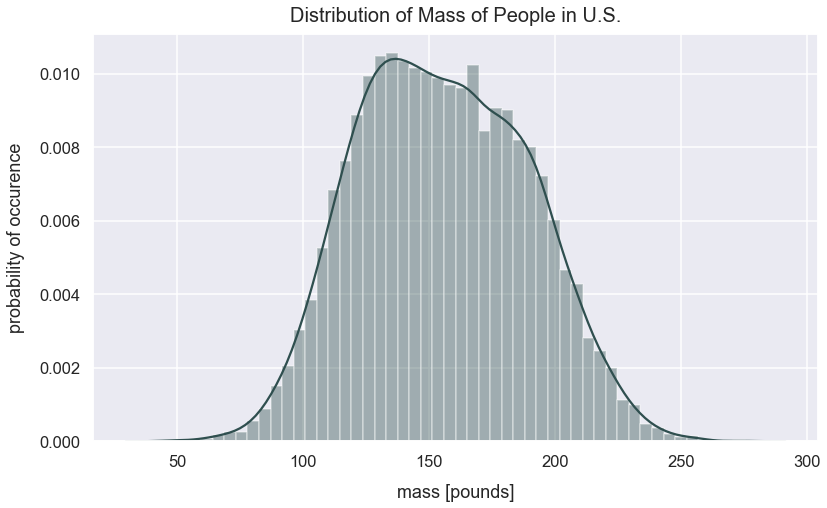

In [4]:
sns.distplot(df_ppl_mass['us_people_mass_pounds'], color="darkslategrey")
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of People in U.S.", y=1.015, fontsize=20);

Sulit untuk menggambarkan distribusi ini. Ada satu puncak besar di sekitar 140 pound, dan itu bukan distribusi normal karena tidak ada simetri di sekitar nilai pusat.

## Menghitung statistik ringkasa populasi

### Rata-rata

In [5]:
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

155.4232805942338

### Standar Deviasi

In [6]:
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_dev_mass

33.585190883958624

## Problem Setup

Sebagai contoh, terdapat 25 orang yang sering berolahraga setidaknya tiga kali per minggu. Dalam statistik, kami menyebutnya efek pengobatan. Variabel dependen adalah massa orang-orang ini dalam pound.

Massa sampel rata-rata orang yang sering berolahraga setidaknya tiga kali seminggu adalah 163 pound. Saya ingin tahu bagaimana ini dibandingkan dengan populasi massa manusia saat ini. Untuk membandingkan sampel baru orang-orang dari gym, saya perlu membandingkannya dengan distribusi rata-rata sampel dari populasi kami.

Saya perlu menghitung di mana rata-rata sampel sebesar 163 pound akan jatuh pada distribusi sampel rata-rata dari massa orang-orang dari populasi A.S.

## Membuat list sample n = 25

Secara hipotesis, ini didasarkan hanya untuk memilih satu sampel dari populasi kami dan membandingkannya dengan pengunjung gym.

Mengingat nilai massa populasi kami, saya akan mengambil 300 sampel masing-masing dari 25 nilai acak dengan penggantian. Untuk setiap sampel, saya akan menghitung rata-rata sampel. Saya menyimpan semua sarana sampel dalam daftar sample_means.

In [7]:
# n = 25
# x = 163

sample_means = []
n = 25
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=df_ppl_mass['us_people_mass_pounds'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

## Melihat plot distribusi sampling

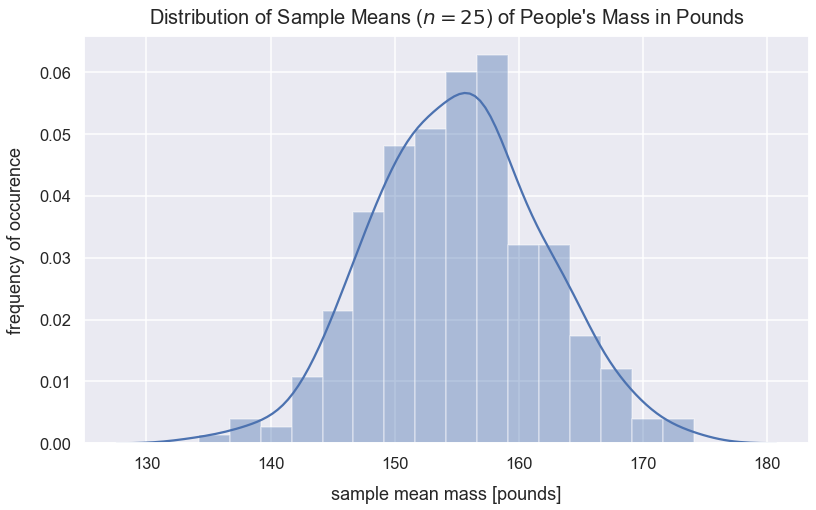

In [8]:
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

Distribusi sampel ini berarti terlihat normal! Kurva cukup simetris di sekitar nilai pusat dan median kira-kira setara dengan rata-rata (lihat di bawah). Berdasarkan teorema limit pusat, pengambilan sampel dalam jumlah yang cukup dengan ukuran yang memadai akan menghasilkan distribusi rata-rata sampel rata-rata.

## Membuat ringkasan statisik berdasarkan plot distribusi sampling(25)

### Median 

In [9]:
median_of_sample_means = np.mean(sample_means)
median_of_sample_means

155.12418330193915

### Mean

In [10]:
mean_of_sample_means = np.mean(sample_means)
print('Mean from sample: ' +str(mean_of_sample_means))
print('Mean from mass: '+str(pop_mean_mass))

Mean from sample: 155.12418330193915
Mean from mass: 155.4232805942338


## Standar Deviasi

In [11]:
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.734407481483423

## Standar Error

Standar deviasi sampel lebih sering disebut kesalahan standar (SE).

In [12]:
standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.717038176791725

## Membandingkan sample mean dengan sampling distribution

Mari kita lihat bagaimana sampel orang dari gym membandingkan dengan distribusi sampling ini. Ingat, rata-rata sampel orang dari gym adalah 163 pound.

Nilai 163 ini adalah estimasi titik karena merupakan estimasi titik tunggal.

Saya sendiri memperkirakan semua sampel dari gym ini akan memiliki rata-rata 163 pound. Namun, jika saya mengumpulkan sampel tambahan dari gym, saya tidak akan mengharapkan rata-rata sampel berarti 163.


In [13]:
gym_sample_mean = 163

## Visualisasi sample mean yang dibandingkan dengan sampling distribution


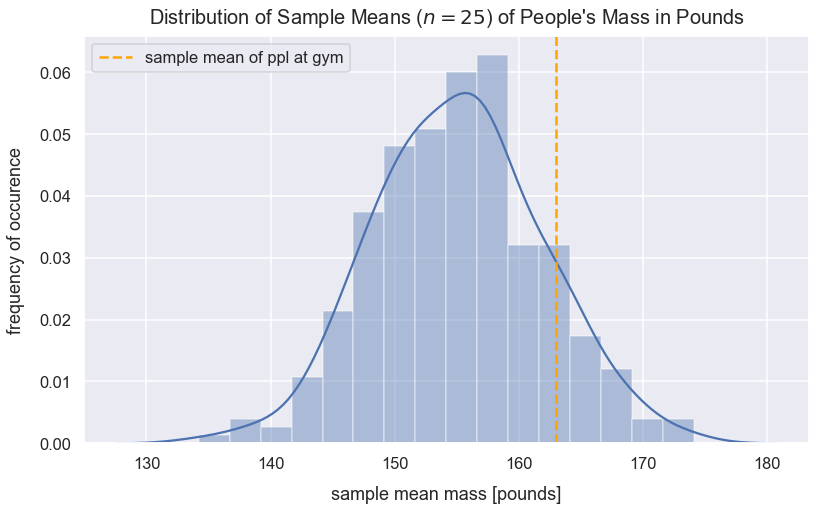

In [14]:
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.axvline(x=gym_sample_mean, linestyle='--', linewidth=2.5, label="sample mean of ppl at gym", c='orange')
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

## Z-Score


Z-Score Penting Untuk distribusi pengambilan sampel di atas, sekitar 95% dari nilai akan jatuh dalam 2 kesalahan standar dari rata-rata. Mari kita menghitung nilai z-score yang mengikat 95% dari data. Kita tahu bahwa ekor pada masing-masing ujung harus 2,5% atau 0,025 dari total area di bawah kurva distribusi sampling.

Di bawah ini saya menggunakan skor-z 1,96 untuk menghitung ekor 0,025.

In [15]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

Area di bawah kurva antara z-score sekitar 0,95

In [16]:
1 - (tail * 2)

0.950004209703559

Mari kita hitung batas pasti untuk area di mana 95% sampel berarti berada dari rata-rata populasi

In [17]:
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
lower_95_perc_bound

141.95878847542738

In [18]:
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
upper_95_perc_bound

168.28957812845093

## Visualisasi z-score yang mengikat 95% dari data

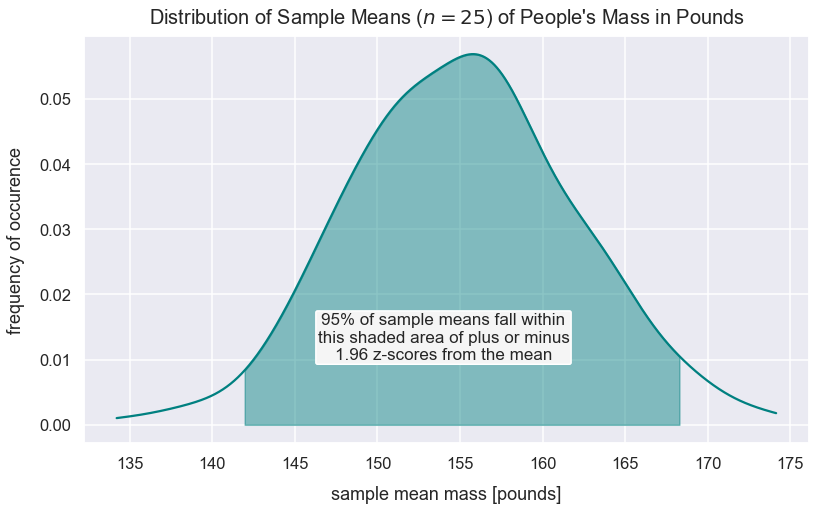

In [19]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.text(x=154, y=.01, horizontalalignment='center', fontsize=17, 
         s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

## Fungsi distribusi probabilitas

Distribusi probabilitas adalah fungsi di bawah teori probabilitas dan statistik-yang memberi kita bagaimana kemungkinan hasil yang berbeda dalam percobaan.

Berikut jenis-jenis distribusi probabilitas yang dapat di implementasikan dalam python :

## Uniform Distribution


Anda dapat memvisualisasikan distribusi uniform dalam python dengan bantuan generator angka acak yang bekerja pada interval angka (a, b). Anda perlu mengimpor fungsi uniform dari modul scipy.stats.uniform()

In [20]:
from scipy.stats import uniform

Fungsi uniform menghasilkan variabel kontinu uniform antara interval yang ditentukan melalui argumen loc dan skala. Distribusi ini konstan antara loc dan loc + skala. Argumen ukuran menggambarkan jumlah variasi acak. Jika Anda ingin mempertahankan reproduktifitas, sertakan argumen random_state yang ditugaskan ke suatu nomor.  

In [21]:
#random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

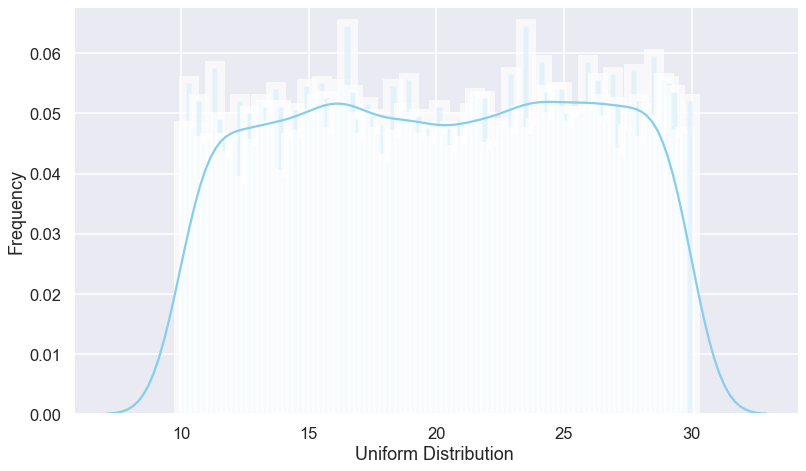

In [22]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':0.7})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## Normal Distribution

Normal distribution juga dikenal sebagai gaussian distribution

Bentuk dari normal distribution :


In [23]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

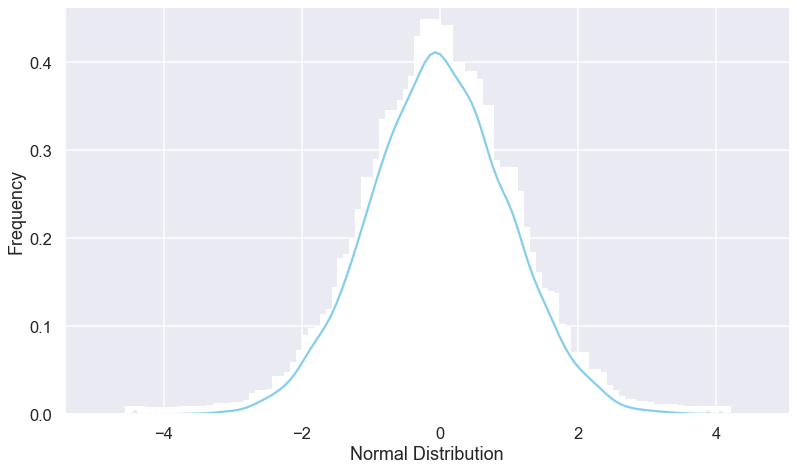

In [24]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

## Gamma Distribution

Distribusi gamma adalah keluarga dua parameter dari distribusi probabilitas kontinu. Walaupun jarang digunakan dalam bentuk mentah, tetapi distribusi populer lainnya seperti distribusi eksponensial, chi-square, distribusi erlang adalah kasus khusus dari distribusi gamma.

Bentuk Gamma Distribution :

In [25]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distribution')]

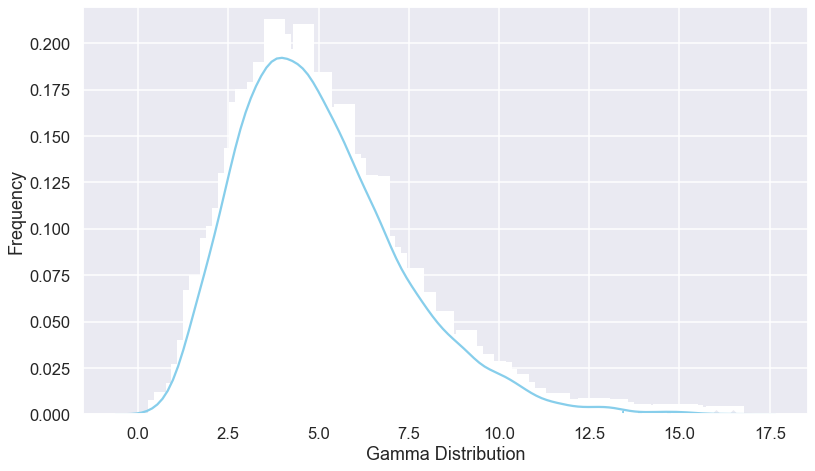

In [26]:
ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

## Exponential Distribution

In [27]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

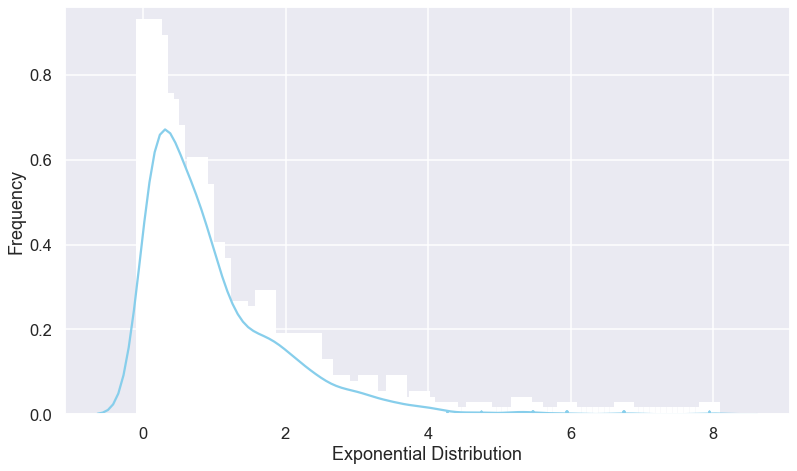

In [28]:
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## Poisson Distribution

biasanya digunakan untuk memodelkan berapa kali peristiwa terjadi dalam interval waktu

In [29]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

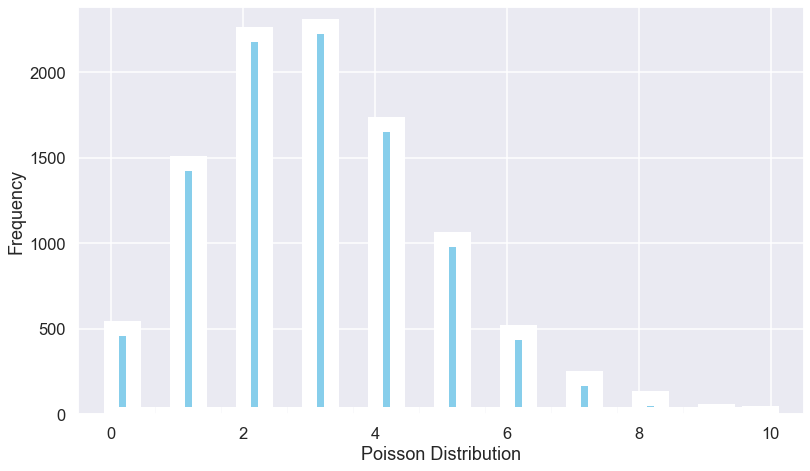

In [30]:
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## Binomial Distribution

Distribusi di mana hanya dua hasil yang mungkin, seperti keberhasilan atau kegagalan, untung atau rugi, menang atau kalah dan di mana probabilitas keberhasilan dan kegagalan adalah sama untuk semua percobaan disebut Distribusi Binomial.

In [31]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

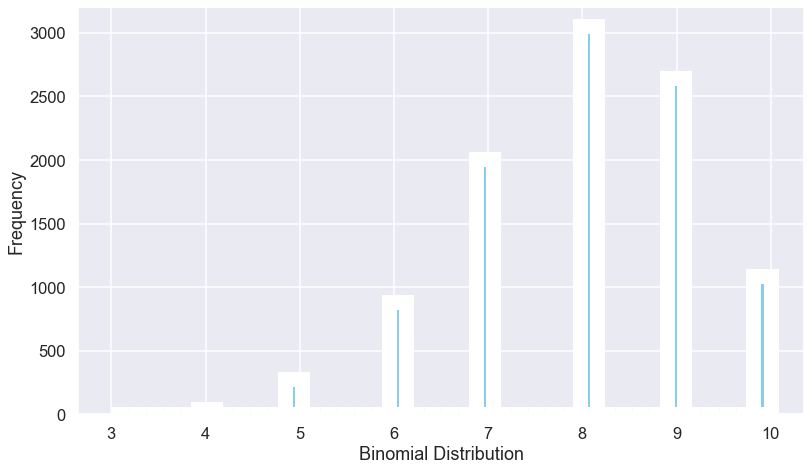

In [32]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

## Bernoulli Distribution

Distribusi Bernoulli hanya memiliki dua hasil yang mungkin, yaitu
1(sukses) dan 0 (kegagalan).

In [33]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

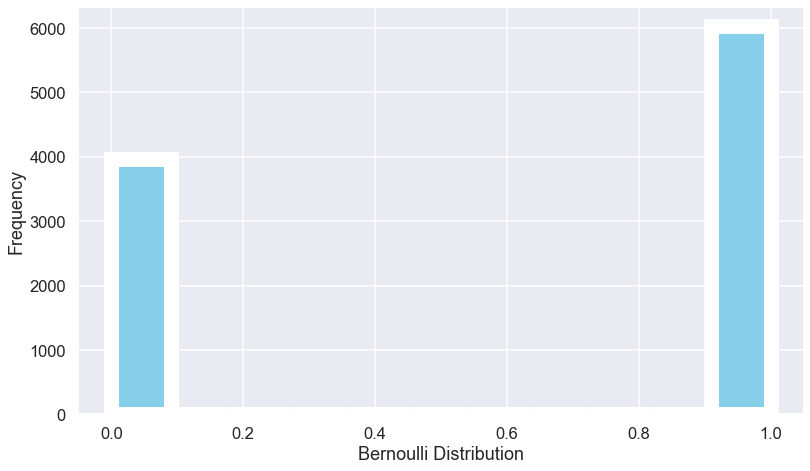

In [34]:
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

## Hypotesis Testing

Pengujian hipotesis dalam statistik adalah cara bagi Anda untuk menguji hasil survei atau eksperimen untuk melihat apakah Anda memiliki hasil yang bermakna. Anda pada dasarnya menguji apakah hasil Anda valid dengan mencari tahu peluang bahwa hasil Anda terjadi secara kebetulan. Jika hasil Anda mungkin terjadi secara kebetulan, percobaan tidak akan dapat diulang sehingga tidak banyak digunakan.

Pengujian hipotesis dapat menjadi salah satu aspek yang paling membingungkan bagi siswa, sebagian besar karena sebelum Anda bahkan dapat melakukan tes, Anda harus tahu apa hipotesis nol Anda. Seringkali, masalah kata rumit yang Anda hadapi dapat sulit diuraikan. Tetapi itu lebih mudah dari yang Anda pikirkan; yang perlu Anda lakukan adalah:

- Cari tahu hipotesis nol Anda,
- Nyatakan hipotesis nol Anda,
- Pilih jenis tes apa yang perlu Anda lakukan,
- Baik mendukung atau menolak hipotesis nol.


### Apa itu hipotesis null?

Jika Anda menelusuri kembali sejarah sains, hipotesis nol selalu menjadi fakta yang diterima. Contoh sederhana hipotesis nol yang diterima secara umum adalah benar:
- DNA berbentuk seperti heliks ganda.
- Ada 8 planet di tata surya (tidak termasuk Pluto).
- Mengambil Vioxx dapat meningkatkan risiko masalah jantung (obat sekarang diambil dari pasar).

### Bagaimana menyatakan hipotesis null?

Anda tidak akan diharuskan untuk benar-benar melakukan percobaan atau survei nyata dalam statistik dasar (atau bahkan menyangkal fakta seperti "Pluto adalah sebuah planet"!), Jadi Anda akan diberikan masalah kata dari situasi kehidupan nyata. Anda harus mencari tahu apa hipotesis Anda dari masalah tersebut. Ini bisa menjadi sedikit lebih rumit daripada hanya mencari tahu apa fakta yang diterima. Dengan masalah kata, Anda mencari untuk menemukan fakta yang dapat dibatalkan (mis. Sesuatu yang dapat Anda tolak).

### Contoh pengujian hipotsesis 


Seorang peneliti berpikir bahwa jika pasien operasi lutut pergi ke terapi fisik dua kali seminggu (bukannya 3 kali), masa pemulihan mereka akan lebih lama. Waktu pemulihan rata-rata untuk pasien operasi lutut adalah 8,2 minggu.
Pernyataan hipotesis dalam pertanyaan ini adalah bahwa peneliti percaya waktu pemulihan rata-rata lebih dari 8,2 minggu. Itu dapat ditulis dalam istilah matematika sebagai: H1: μ> 8.2
Selanjutnya, Anda harus menyatakan hipotesis nol (Lihat: Bagaimana menyatakan hipotesis nol). Itulah yang akan terjadi jika peneliti salah. Dalam contoh di atas, jika peneliti salah maka waktu pemulihan kurang dari atau sama dengan 8,2 minggu. Dalam matematika, itu: H0 μ ≤ 8.2

### Menolak hipotesis null

Sepuluh tahun yang lalu, kami percaya bahwa ada 9 planet di tata surya. Pluto didemosiasikan sebagai sebuah planet pada tahun 2006. Hipotesis nol dari "Pluto adalah sebuah planet" digantikan oleh "Pluto bukanlah sebuah planet." Tentu saja, menolak hipotesis nol tidak selalu mudah - bagian yang sulit biasanya mencari tahu apa hipotesis nol Anda di tempat pertama.

### Interpretasi Tes Statistik

Hasil uji hipotesis statistik harus ditafsirkan agar kami dapat mulai membuat klaim.
Ini adalah poin yang dapat menyebabkan banyak kebingungan bagi pemula dan praktisi berpengalaman.
Ada dua bentuk umum yang dihasilkan dari uji hipotesis statistik, dan harus ditafsirkan dengan cara yang berbeda. Mereka adalah p-value dan critical value.

### Menafsirkan p-value

Kami menggambarkan temuan sebagai signifikan secara statistik dengan menafsirkan nilai-p.

Sebagai contoh, kami dapat melakukan uji normalitas pada sampel data dan menemukan bahwa tidak mungkin sampel data menyimpang dari distribusi Gaussian, gagal menolak hipotesis null.

Tes hipotesis statistik dapat mengembalikan nilai yang disebut p atau nilai-p. Ini adalah jumlah yang dapat kita gunakan untuk menafsirkan atau mengukur hasil tes dan menolak atau gagal untuk menolak hipotesis nol. Ini dilakukan dengan membandingkan nilai-p ke nilai ambang yang dipilih sebelumnya yang disebut tingkat signifikansi.

Tingkat signifikansi sering disebut oleh alfa huruf kecil Yunani.

Nilai umum yang digunakan untuk alpha adalah 5% atau 0,05. Nilai alpha yang lebih kecil menunjukkan interpretasi yang lebih kuat dari hipotesis null, seperti 1% atau 0,1%.

Nilai p dibandingkan dengan nilai alpha yang dipilih sebelumnya. Hasil secara statistik signifikan ketika nilai p kurang dari alpha. Ini menandakan perubahan telah terdeteksi: bahwa hipotesis default dapat ditolak.

- Jika p-value> alpha: Gagal menolak hipotesis nol (mis. Tidak hasil yang signifikan).
- Jika p-value <= alpha: Tolak hipotesis nol (mis. Hasil signifikan).

Misalnya, jika kami melakukan tes apakah sampel data normal dan kami menghitung nilai p 0,07, kami dapat menyatakan sesuatu seperti:

Tes menemukan bahwa sampel data normal, gagal menolak hipotesis nol pada tingkat signifikansi 5%.

### Proporsi sebuah populasi

Pertanyaan penelitian

Pada tahun-tahun sebelumnya, 52% orang tua percaya bahwa elektronik dan media sosial adalah penyebab kurang tidur remaja mereka. Apakah lebih banyak orang tua saat ini percaya bahwa remaja mereka kurang tidur disebabkan oleh elektronik dan media sosial?

Populasi: Orang tua dengan remaja (usia 13-18) \ Parameter Minat: p

Hipotesis Null: p = 0,52 \ Hipotesis Alternatif: p> 0,52 (perhatikan bahwa ini adalah tes satu sisi)

Data: 1018 orang disurvei. 56% dari mereka yang disurvei percaya bahwa kurang tidur remaja mereka disebabkan oleh elektronik dan media sosial.

### Penggunaan proportions_ztest () dari statsmodels.

Perhatikan alternatif argumen = "lebih besar" yang menunjukkan tes satu sisi. Fungsi mengembalikan dua nilai - z-statistik dan nilai-p yang sesuai.

In [35]:

import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
n = 1018
pnull = .52
phat = .56

sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

(2.571067795759113, 0.005069273865860533)

### Kesimpulan dari uji hipotesis

Karena nilai p yang dihitung dari uji-z cukup kecil, kita dapat menolak hipotesis Null bahwa persentase orang tua, yang percaya bahwa kurang tidur remaja mereka disebabkan oleh elektronik dan media sosial, sama seperti tahun-tahun sebelumnya. 'Perkiraan yaitu 52%.
Meskipun, kami tidak menerima hipotesis alternatif, ini secara informal berarti bahwa ada kemungkinan besar proporsi ini menjadi lebih dari 52%.

## Perbedaan dalam populasi 

### Pertanyaan penelitian

Mempertimbangkan orang dewasa dalam data NHANES, apakah pria memiliki Indeks Massa Tubuh rata-rata yang lebih tinggi daripada wanita?


In [37]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [38]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [39]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846985, 6.252567616801485)

In [40]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [41]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

### Kesimpulan dari uji hipotesis

Karena p-value (6.59e-10) sangat kecil, kita dapat menolak hipotesis Null bahwa BMI rata-rata laki-laki sama dengan perempuan. Catatan, kami menggunakan alternatif = "dua sisi" dalam uji-z karena di sini kami memeriksa ketidaksetaraan.

Kami juga dapat memplot histogram data untuk memeriksa apakah kira-kira mengikuti distribusi Normal.

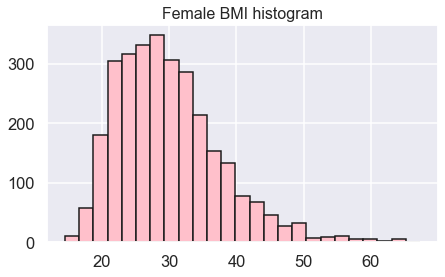

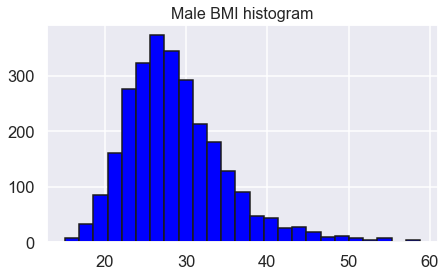

In [42]:
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(male["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()


## Lembar uji hipotesis statistik

## Normality test

Bagian ini mencantumkan tes statistik yang dapat Anda gunakan untuk memeriksa apakah data Anda memiliki distribusi Gaussian.
Menguji apakah sampel data memiliki distribusi Gaussian.

### Asumsi
- pengamatan dalam setiap sampel independen dan terdistribusi secara identik (iid).

### Penafsiran
- H0: sampel memiliki distribusi Gaussian.
- H1: sampel tidak memiliki distribusi Gaussian.

### Shapiro wilk-test


In [43]:
# Example of the Shapiro-Wilk Normality Test

from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


### VD’Agostino’s K^2 Test

In [44]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


### Anderson-Darling Test


In [45]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


## Tes Korelasi
Bagian ini mencantumkan tes statistik yang dapat Anda gunakan untuk memeriksa apakah dua sampel terkait.

### Koefisien Korelasi Pearson
Menguji apakah dua sampel memiliki hubungan linier.

### Asumsi 

- Pengamatan dalam setiap sampel independen dan terdistribusi secara identik (iid).
- Pengamatan pada setiap sampel terdistribusi secara normal.
- Pengamatan pada setiap sampel memiliki varians yang sama.

### Penafsiran
- H0: dua sampel independen.
- H1: ada ketergantungan antara sampel.


In [46]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


### Spearman’s Rank Correlation

Tes apakah dua sampel memiliki hubungan monotonik.

### Asumsi

Pengamatan dalam setiap sampel independen dan terdistribusi secara identik (iid). Pengamatan di setiap sampel dapat diberi peringkat.

### Penafsran

- H0: dua sampel independen. 
- H1: ada ketergantungan antara sampel.

In [47]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


### Kendall's Rank Correlation

Tes apakah dua sampel memiliki hubungan monotonik.

### Asumsi 

Pengamatan dalam setiap sampel independen dan terdistribusi secara identik (iid). Pengamatan di setiap sampel dapat diberi peringkat.

### Penafsran

- H0: dua sampel independen. 
- H1: ada ketergantungan antara sampel.

In [48]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


### Chi-Squared Test
Tes apakah dua variabel kategori terkait atau independen.

### Asumsi

- Pengamatan yang digunakan dalam perhitungan tabel kontingensi adalah independen.
- 25 atau lebih contoh di setiap sel tabel kontingensi.

### Penafsran

- H0: dua sampel independen. 
- H1: ada ketergantungan antara sampel.

In [49]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.272, p=0.873
Probably independent


## Stationary Test

Bagian ini mencantumkan tes statistik yang dapat Anda gunakan untuk memeriksa apakah rangkaian waktu stasioner atau tidak.

### Augmented Dickey-Fuller Unit Root Test

Menguji apakah rangkaian waktu memiliki unit root, mis. memiliki tren atau lebih umumnya bersifat autoregresif.

### Asumsi 
Pengamatan di diperintahkan untuk sementara waktu.

### Penafsiran 

- H0: root unit hadir (seri non-stasioner).
- H1: unit root tidak ada (seri stasioner).


In [50]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=nan, p=nan
Probably Stationary


### Kwiatkowski-Phillips-Schmidt-Shin
Menguji apakah deret waktu stasioner atau tidak.

In [51]:

# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.410, p=0.073
Probably not Stationary


## Parametric Statistical Hypothesis Tests
Bagian ini mencantumkan tes statistik yang dapat Anda gunakan untuk membandingkan sampel data.

### Student T'test 
Tes apakah rata-rata dua sampel independen berbeda secara signifikan.

### Asumsi
- Pengamatan dalam setiap sampel independen dan terdistribusi secara identik (iid).
- Pengamatan pada setiap sampel terdistribusi secara normal.
- Pengamatan pada setiap sampel memiliki varians yang sama.

### Penafsiran 
- H0: rata-rata sampel sama.
- H1: rata-rata sampel tidak sama.


In [52]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


### Paired Student T'test
Menguji apakah rata-rata dua sampel berpasangan berbeda secara signifikan.

In [53]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


### Analysis of Variance Test (ANOVA)

In [54]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


## Nonparametric Statistical Hypothesis Tests

### Mann-Whitney U Test
Menguji apakah distribusi dua sampel independen sama atau tidak.

### Asumsi
- Pengamatan dalam setiap sampel independen dan terdistribusi secara identik (iid).
- Pengamatan di setiap sampel dapat diberi peringkat.

### Penafsiran
- H0: distribusi kedua sampel sama.
- H1: distribusi kedua sampel tidak sama.

In [55]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=40.000, p=0.236
Probably the same distribution


### Wilcoxon Signed-Rank Test
Menguji apakah distribusi dua sampel independen sama atau tidak.


### Asumsi
- Pengamatan dalam setiap sampel independen dan terdistribusi secara identik (iid).
- Pengamatan di setiap sampel dapat diberi peringkat.
- Pengamatan di setiap sampel dipasangkan.

### Penafsiran
- H0: distribusi kedua sampel sama.
- H1: distribusi kedua sampel tidak sama.


In [56]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=21.000, p=0.508
Probably the same distribution


### Kruskal-Wallis H Test
Menguji apakah distribusi dua sampel independen sama atau tidak.

### Asumsi
- Pengamatan dalam setiap sampel independen dan terdistribusi secara identik (iid).
- Pengamatan di setiap sampel dapat diberi peringkat.


### Penafsiran
- H0: distribusi kedua sampel sama.
- H1: distribusi kedua sampel tidak sama.


In [57]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


### Friedman Test
Menguji apakah distribusi dua sampel independen sama atau tidak.


### Asumsi
- Pengamatan dalam setiap sampel independen dan terdistribusi secara identik (iid).
- Pengamatan di setiap sampel dapat diberi peringkat.
- Pengamatan di setiap sampel dipasangkan.

### Penafsiran
- H0: distribusi kedua sampel sama.
- H1: distribusi kedua sampel tidak sama.


In [59]:
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution
